### Regresión Logística para predicciones bancarias

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv('python-ml-course-master/datasets/bank/bank.csv',sep= ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [77]:
data.shape

(4119, 21)

In [113]:
#data["y"] = (data["y"]=="yes").astype(int) #Convierte los no a 0 y si a 1
data['y'] = data['y'].apply(lambda x: 0 if x=='no' else 1)
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [114]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [115]:
data['education'] = np.where(data['education'] == 'basic.4y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.6y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.9y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'high.school','High School',data['education'])
data['education'] = np.where(data['education'] == 'professional.course','Professional Course',data['education'])
data['education'] = np.where(data['education'] == 'illiterate','Illiterate',data['education'])
data['education'] = np.where(data['education'] == 'unknown','Unknown',data['education'])

In [106]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [82]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [83]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538


Text(0, 0.5, 'Frecuencia de compra de producto')

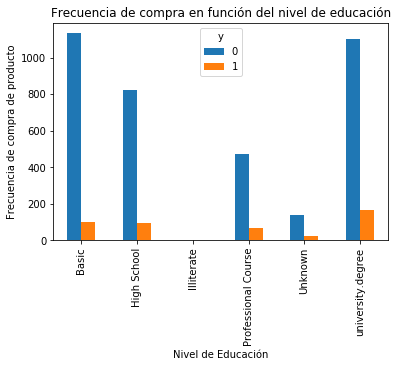

In [84]:
%matplotlib inline
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia de compra de producto')

Text(0, 0.5, 'Proporción de clientes')

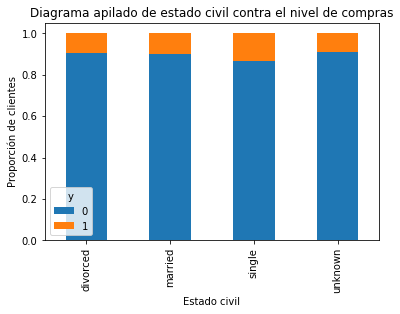

In [85]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked=True)
plt.title('Diagrama apilado de estado civil contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

Text(0, 0.5, 'Frecuencia de compra del producto')

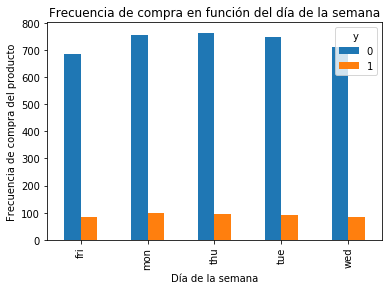

In [86]:
pd.crosstab(data.day_of_week,data.y).plot(kind = 'bar')
plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compra del producto')

Text(0, 0.5, 'Frecuencia de compra')

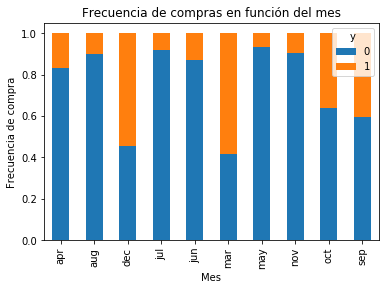

In [87]:
table = pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked=True)
plt.title('Frecuencia de compras en función del mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')

Text(0, 0.5, 'Frecuencia de compra')

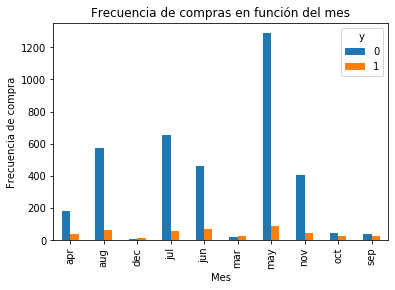

In [88]:
table = pd.crosstab(data.month,data.y)
table.plot(kind = 'bar')
plt.title('Frecuencia de compras en función del mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')

Text(0, 0.5, 'Clientes')

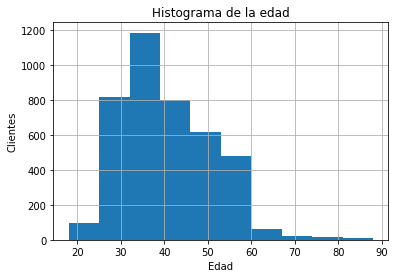

In [89]:
%matplotlib inline
data.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Clientes')

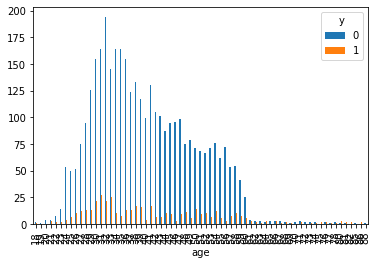

In [90]:
pd.crosstab(data.age,data.y).plot(kind='bar')

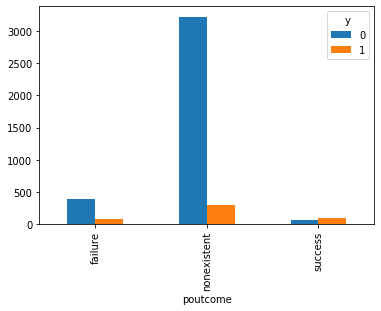

In [91]:
pd.crosstab(data.poutcome,data.y).plot(kind = 'bar')

### Conversión de las variables categoricas a Dummies

In [116]:
categories = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
for category in categories:
    cat_list = 'cat'+"_"+category
    cat_dummies = pd.get_dummies(data[category],prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [117]:
data_vars = data.columns.values.tolist()

In [118]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ['default']]
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_Unknown',
 'education_university.degree',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',

In [119]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_Unknown', 'education_university.degree', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [120]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos del modelo (selección de variables predictoras)

In [121]:
n = 12 # número de variables

In [122]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression(solver='liblinear')

In [131]:
rfe = RFE(lr,n)
rfe = rfe.fit(bank_data[X],bank_data[Y].values.ravel())

In [132]:
print(rfe.support_) #Cuales variables se queda

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [133]:
print(rfe.ranking_) #Que tan importantes son esas variables

[33 39 19 43  1 12 26 25  1 36 23  3  1 35  2 37  1  5 32 30 11 45 20 42
 29 47 41 38 46 13  8 14  9  6 21 22 15 16 18  4 31 24  1  1  1  1  1 17
  1 44 34 27 40 28 10  1  7  1]


In [136]:
z = zip(bank_data_vars,rfe.support_,rfe.ranking_)
seleccion = list(z)

In [142]:
cols = []
for z in seleccion:
    if z[2] == True:
        cols.append(z[0])
cols

['previous',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_nov',
 'day_of_week_wed',
 'poutcome_nonexistent']

In [143]:
X = bank_data[cols]
Y = bank_data['y']

### Implementar del modelo en python con statsmodel.api

In [144]:
import statsmodels.api as sm

In [145]:
logit_model = sm.Logit(Y,X)

In [146]:
result = logit_model.fit() #ejecuta el mismo el newton rhapson 

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [147]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.1554
Time:                        14:50:10   Log-Likelihood:                -1201.8
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 6.449e-88
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.1229      0.070     -1.755      0.079      -0.260       0.014
euribor3m               -0.6049      0.038    -15.788      0.000      -0.680      -0.530
job_blue-collar         -0.5032      0.152     -3.314      0.001      -0.801      -0.206
job_retired              0.2235      0.219      1.021      0.307      -0.206       0.653
month_aug                0.6048      0.176      3.437      0.001       0.260       0.950
month_dec                1.1358      0.449      2.528      0.011       0.255       2.016
month_jul                1.0327      0.191      5.407      0.000       0.658       1.407
month_jun                1.0775      0.175      6.149      0.000       0.734       1.421
month_mar                1.6448      0.314      5.241      0.000       1.030       2.260
month_nov                0.3828      0.195      1.963      0.050       0.001       0.765
day_of_week_wed         -0.0649      0.139     -0.466      0.641      -0.338       0.208
poutcome_nonexistent    -0.7753      0.122     -6.349      0.000      -1.015      -0.536
========================================================================================
"""

### Implementación del modelo en python con scikit-learn

In [148]:
from sklearn import linear_model

In [150]:
logit_m = linear_model.LogisticRegression(solver='liblinear')
logit_m.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
logit_m.score(X,Y)

0.8963340616654528

In [153]:
Y.mean()

0.10949259529011895

In [154]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_m.coef_)))) # Variables con sus coeficientes

,0,1
0,previous,[0.5076571353702829]
1,euribor3m,[-0.546496133920961]
2,job_blue-collar,[-0.3591553622507818]
3,job_retired,[0.35603838876396016]
4,month_aug,[0.6253983085949565]
5,month_dec,[1.1822172985978154]
6,month_jul,[0.9622633626968825]
7,month_jun,[1.0543179248209773]
8,month_mar,[1.6306366297798072]
9,month_nov,[0.45195768179106927]


### Validación del modelo logístico

In [155]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state= 0) 

In [158]:
lm = linear_model.LogisticRegression(solver='liblinear')

In [159]:
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
from IPython.display import display, Math, Latex

In [164]:
display(Math(r'Y_p = \begin{cases} 0 & si\ p \leq 0.5 \\ 1 & si\ p > 0.5 \end{cases}'))

<IPython.core.display.Math object>

In [160]:
probs = lm.predict_proba(X_test)

In [161]:
prediction = lm.predict(X_test)

In [166]:
display(Math(r'\varepsilon \in [0,1] , Y_p = \begin{cases} 0 & si\ p \leq \varepsilon \\ 1 & si\ p > \varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [168]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]> threshold,1,0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [169]:
pd.crosstab(prob_df.prediction,columns = 'count')

col_0,count
prediction,
0,846
1,390


In [171]:
threshold = 0.05
prob_df['prediction'] = np.where(prob_df[0]> threshold,1,0)
pd.crosstab(prob_df.prediction,columns='count')

col_0,count
prediction,
0,504
1,732


In [172]:
from sklearn import metrics
metrics.accuracy_score(Y_test,prediction) #Score de los test y la predicción del modelo

0.9004854368932039

### Validación Cruzada

In [173]:
from sklearn.model_selection import cross_val_score

In [186]:
scores = cross_val_score(linear_model.LogisticRegression(solver='liblinear'),X,Y,scoring='accuracy',cv=10)

In [187]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [188]:
scores.mean()

0.8943884240990478

### Matrices de Confusión y curvas ROC

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state= 0) 

In [190]:
lm = linear_model.LogisticRegression(solver = 'liblinear')
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
probs = lm.predict_proba(X_test)

In [215]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [216]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [211]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
FP

308

In [197]:
sensibilidad = TP/(TP+FN)
sensibilidad

0.21025641025641026

In [199]:
especificidad = 1-TN/(TN+FP)
especificidad

0.047281323877068515

In [230]:
thresholds= [0.04,0.05,0.07,0.1,0.12,0.15,0.18,0.2,0.25,0.3,0.4,0.5]
sensibilidades = [1]
especificidades_1 = [1]
for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0]>t,1,0)
    prob_df['actual'] = list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sensibilidad = TP/(TP+FN)
    especificidad = 1-TN/(TN+FP)
    sensibilidades.append(sensibilidad)
    especificidades_1.append(especificidad)

especificidades_1.append(0)
sensibilidades.append(0)

In [201]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sensibilidad')

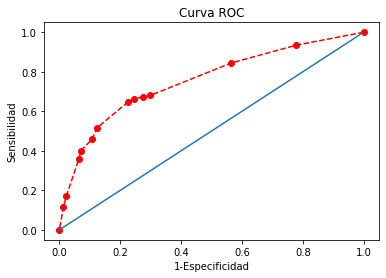

In [231]:
%matplotlib inline
plt.plot(especificidades_1,sensibilidades,marker ='o',linestyle = '--',color = 'r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

plt.plot(x,y)
plt.title('Curva ROC')
plt.xlabel('1-Especificidad')
plt.ylabel('Sensibilidad')

In [237]:
from sklearn import metrics
from ggplot import *

In [238]:
espc_1,sensit,_ = metrics.roc_curve(Y_test,prob)

In [247]:
df = pd.DataFrame({
    'esp':espc_1,
    'sense':sensit
})
df.head()

,esp,sense
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


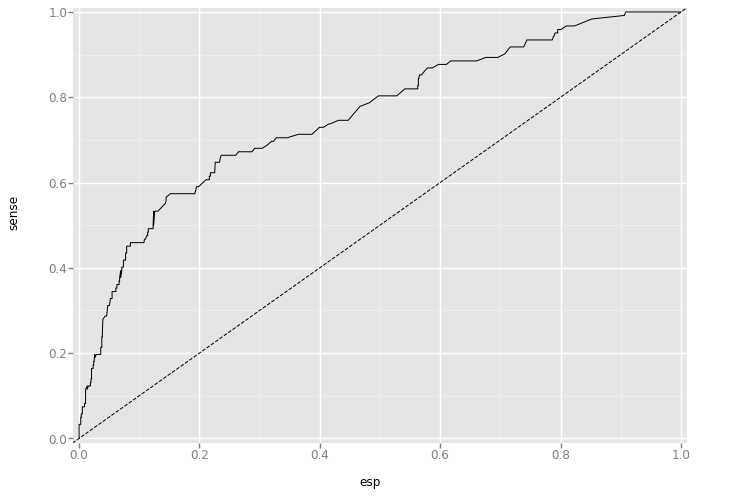

<ggplot: (-9223371862245885517)>

In [248]:
ggplot(df,aes(x='esp',y = 'sense'))+ geom_line()+ geom_abline(linetype='dashed') + xlim(-0.01,1.01) + ylim(-0.01,1.01) #Curva ROC

In [253]:
auc = metrics.auc(espc_1,sensit)
auc #Aréa bajo la curva ROC Area under curve

0.7575712982311564

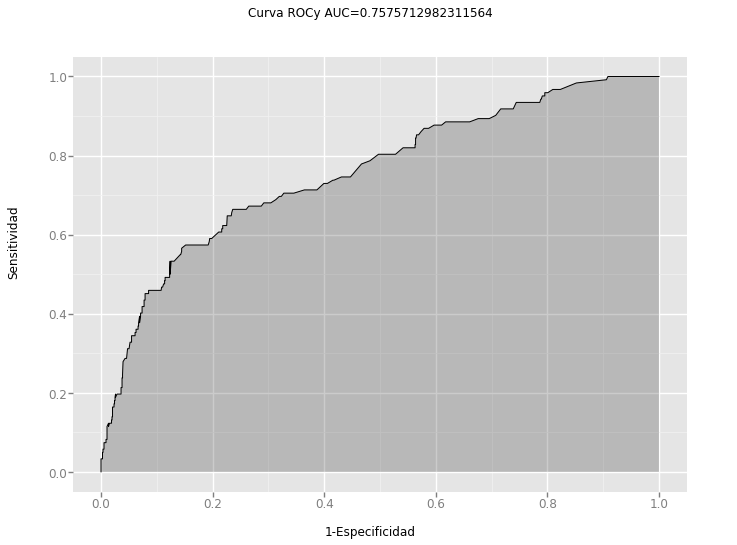

<ggplot: (174609731206)>

In [254]:
ggplot(df,aes(x='esp', y='sense')) + geom_area(alpha=0.25)+ geom_line(aes(y='sense'))+ggtitle('Curva ROCy AUC=%s' % str(auc))+xlab("1-Especificidad") + ylab('Sensitividad')